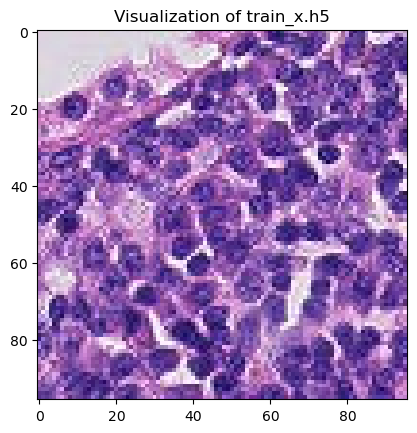

In [1]:
import os
import h5py
import matplotlib.pyplot as plt


folder_path = '/Users/ramsesnestor/Desktop/data'


file_to_dataset = {
    'train_x.h5': 'x',
    'train_y.h5': 'y',
    'valid_x.h5': 'x',
    'valid_y.h5': 'y',
    'test_x.h5': 'x',
    'test_y.h5': 'y'
}


for filename, dataset_name in file_to_dataset.items():
    file_path = os.path.join(folder_path, filename)
    
    with h5py.File(file_path, 'r') as file:
       
        dataset = file[dataset_name]
        
        
        data = dataset[:]
        
 
        
      
        if 'train_x.h5' in filename:
            plt.imshow(data[0], cmap='gray')  
            plt.title(f'Visualization of {filename}')
            plt.show()


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


from PIL import Image, UnidentifiedImageError
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import load_model

In [3]:
x_train, y_train, x_valid, y_valid, x_test, y_test = None, None, None, None, None, None


for filename, dataset_name in file_to_dataset.items():
    file_path = os.path.join(folder_path, filename)
    
    with h5py.File(file_path, 'r') as file:
        
        dataset = file[dataset_name]
        
        
        if 'train_x.h5' in filename:
            x_train = dataset[:]
        elif 'train_y.h5' in filename:
            y_train = dataset[:]
        elif 'valid_x.h5' in filename:
            x_valid = dataset[:]
        elif 'valid_y.h5' in filename:
            y_valid = dataset[:]
        elif 'test_x.h5' in filename:
            x_test = dataset[:]
        elif 'test_y.h5' in filename:
            y_test = dataset[:]

In [4]:
len(x_train), len(y_train), len(x_valid), len(y_valid), len(x_test), len(y_test)

(262144, 262144, 32768, 32768, 32768, 32768)

In [5]:
#checking for class imbalance

import numpy as np

unique_classes, class_counts = np.unique(y_train, return_counts=True)

for i, class_count in enumerate(class_counts):
    class_name = unique_classes[i]
    print(f"Class {class_name}: {class_count} samples")


Class 0: 131072 samples
Class 1: 131072 samples


In [6]:
x_train = x_train.astype('float32') / 255.0
x_valid = x_valid.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [7]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))
y_valid = np.asarray(y_valid).astype('float32').reshape((-1,1))

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


datagen.fit(x_train)


In [10]:
x_train = x_train.reshape(x_train.shape[0], 96, 96, 3)
x_valid = x_valid.reshape(x_valid.shape[0], 96, 96, 3)
x_test = x_test.reshape(x_test.shape[0], 96, 96, 3)


In [11]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))
y_valid = np.asarray(y_valid).astype('float32').reshape((-1,1))

In [12]:
x_train_final, x_val_final, y_train_final, y_val_final = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42
)

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models

model_1 = Sequential([
    Flatten(input_shape=(96, 96, 3)),  
    Dense(128, activation='relu'), 
    Dense(1, activation='sigmoid')  
])

# Compile the model
model_1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
)

# Summarize the model architecture
model_1.summary()

2023-09-18 20:30:20.042596: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-18 20:30:20.043335: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M2 Max
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 27648)             0         
                                                                 
 dense (Dense)               (None, 128)               3539072   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,539,201
Trainable params: 3,539,201
Non-trainable params: 0
_________________________________________________________________


In [14]:
history_1 = model_1.fit(datagen.flow(x_train_final, y_train_final, batch_size=16), validation_data=(x_val_final, y_val_final),
                    
                     steps_per_epoch=len(x_train_final)/16, epochs=10)

Epoch 1/10


2023-09-18 20:30:23.643546: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-09-18 20:30:23.951888: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14745/14745 [============================>.] - ETA: 0s - loss: 0.7018 - accuracy: 0.4997 - precision: 0.4998 - recall: 0.4981 - auc: 0.4990

2023-09-18 20:37:08.445906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14745/14745 [==============================] - 410s 28ms/step - loss: 0.7018 - accuracy: 0.4997 - precision: 0.4998 - recall: 0.4981 - auc: 0.4990 - val_loss: 0.6931 - val_accuracy: 0.5009 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 2/10
14745/14745 [==============================] - 311s 21ms/step - loss: 0.6932 - accuracy: 0.5006 - precision: 0.5008 - recall: 0.4641 - auc: 0.4991 - val_loss: 0.6932 - val_accuracy: 0.4991 - val_precision: 0.4991 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 3/10
14745/14745 [==============================] - 247s 17ms/step - loss: 0.6932 - accuracy: 0.4983 - precision: 0.4984 - recall: 0.5264 - auc: 0.4986 - val_loss: 0.6932 - val_accuracy: 0.5009 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 4/10
14745/14745 [==============================] - 762s 52ms/step - loss: 0.6932 - accuracy: 0.5022 - precision: 0.5021 - recall: 0.5465 - auc: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.5009 - val_

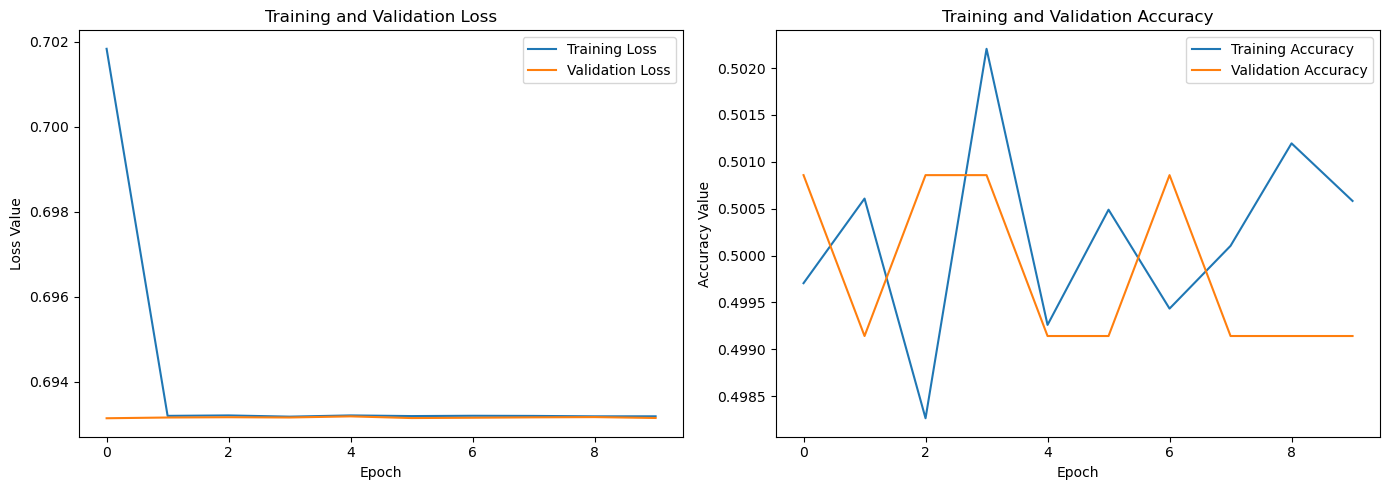

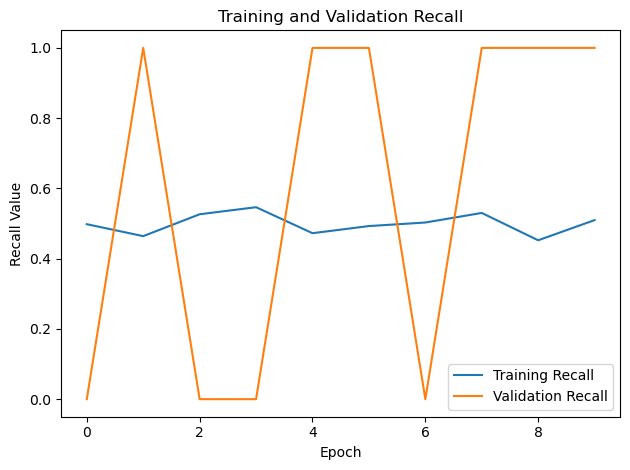

In [15]:
# Plot Loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.legend()

plt.tight_layout()
plt.show()


# Plot Recall
plt.subplot(1, 1, 1)
plt.plot(history_1.history['recall'], label='Training Recall')
plt.plot(history_1.history['val_recall'], label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall Value')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
model_2 = Sequential([
    Flatten(input_shape=(96, 96, 3)),
    Dense(512, activation='relu', kernel_regularizer='l2'),
    Dense(1024, activation='relu', kernel_regularizer='l2'),  
    Dense(2048, activation='relu', kernel_regularizer='l2'),  
    Dense(1, activation='sigmoid')
])

model_2.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy', 'Recall'])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 27648)             0         
                                                                 
 dense_3 (Dense)             (None, 512)               14156288  
                                                                 
 dense_4 (Dense)             (None, 1024)              525312    
                                                                 
 dense_5 (Dense)             (None, 2048)              2099200   
                                                                 
 dense_6 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 16,782,849
Trainable params: 16,782,849
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_2 = model_2.fit(datagen.flow(x_train_final, y_train_final, batch_size=16), 
                                    validation_data=(x_val_final, y_val_final),
                                    steps_per_epoch=len(x_train_final)/16, epochs=10)

Epoch 1/10


2023-09-18 21:27:43.831532: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14746/14745 [==============================] - ETA: 0s - loss: 0.8690 - accuracy: 0.5000 - recall: 0.5712

2023-09-18 21:31:54.065217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14745/14745 [==============================] - 254s 17ms/step - loss: 0.8690 - accuracy: 0.5000 - recall: 0.5712 - val_loss: 0.6932 - val_accuracy: 0.5009 - val_recall: 0.0000e+00
Epoch 2/10
14745/14745 [==============================] - 317s 21ms/step - loss: 0.6932 - accuracy: 0.4999 - recall: 0.4752 - val_loss: 0.6932 - val_accuracy: 0.4991 - val_recall: 1.0000
Epoch 3/10
14745/14745 [==============================] - 272s 18ms/step - loss: 0.6932 - accuracy: 0.5013 - recall: 0.4544 - val_loss: 0.6933 - val_accuracy: 0.4991 - val_recall: 1.0000
Epoch 4/10
  787/14745 [>.............................] - ETA: 9:03 - loss: 0.6933 - accuracy: 0.4990 - recall: 0.9738

In [ ]:
# Plot Loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.legend()

plt.tight_layout()
plt.show()


# Plot Recall
plt.subplot(1, 1, 1)
plt.plot(history_2.history['recall'], label='Training Recall')
plt.plot(history_2.history['val_recall'], label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall Value')
plt.legend()

plt.tight_layout()
plt.show()